# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | port blair
Processing Record 3 of Set 1 | la mira
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | luderitz
Processing Record 7 of Set 1 | fort mcmurray
Processing Record 8 of Set 1 | guerrero negro
Processing Record 9 of Set 1 | san jose del cabo
Processing Record 10 of Set 1 | kerikeri
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | hamilton
Processing Record 14 of Set 1 | pisco
Processing Record 15 of Set 1 | happy valley-goose bay
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | namibe
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | baardheere
Processing Record 20 of Set 1 | kingston
Processing Record 21 of Set 1 | newman

Processing Record 39 of Set 4 | san andres
Processing Record 40 of Set 4 | espargos
City not found. Skipping...
Processing Record 41 of Set 4 | lebu
Processing Record 42 of Set 4 | margate
Processing Record 43 of Set 4 | serdar
Processing Record 44 of Set 4 | natal
Processing Record 45 of Set 4 | hawaiian paradise park
Processing Record 46 of Set 4 | etaples
Processing Record 47 of Set 4 | galesong
Processing Record 48 of Set 4 | kayunga
Processing Record 49 of Set 4 | aliaga
Processing Record 0 of Set 5 | jalqani
Processing Record 1 of Set 5 | la paz
Processing Record 2 of Set 5 | male
Processing Record 3 of Set 5 | bodaybo
Processing Record 4 of Set 5 | carnarvon
Processing Record 5 of Set 5 | badger
Processing Record 6 of Set 5 | as samawah
Processing Record 7 of Set 5 | nizhneangarsk
Processing Record 8 of Set 5 | cabo san lucas
Processing Record 9 of Set 5 | dingzhou
Processing Record 10 of Set 5 | takayama
Processing Record 11 of Set 5 | calingasta
Processing Record 12 of Set 5 |

Processing Record 30 of Set 8 | makassar
Processing Record 31 of Set 8 | aleg
Processing Record 32 of Set 8 | cabedelo
Processing Record 33 of Set 8 | ban karon
Processing Record 34 of Set 8 | damnagar
Processing Record 35 of Set 8 | general acha
Processing Record 36 of Set 8 | corfu
Processing Record 37 of Set 8 | bardai
Processing Record 38 of Set 8 | james island
City not found. Skipping...
Processing Record 39 of Set 8 | genhe
Processing Record 40 of Set 8 | paka
Processing Record 41 of Set 8 | cooper's town
Processing Record 42 of Set 8 | sao tome
Processing Record 43 of Set 8 | beith
Processing Record 44 of Set 8 | nova sintra
Processing Record 45 of Set 8 | mhamid
Processing Record 46 of Set 8 | okha
Processing Record 47 of Set 8 | greymouth
Processing Record 48 of Set 8 | lu-uk
Processing Record 49 of Set 8 | yingshang chengguanzhen
Processing Record 0 of Set 9 | vershino-darasunskiy
Processing Record 1 of Set 9 | coari
Processing Record 2 of Set 9 | rusera
Processing Record 3 

Processing Record 20 of Set 12 | ezine
Processing Record 21 of Set 12 | coronel dorrego
Processing Record 22 of Set 12 | tateyama
Processing Record 23 of Set 12 | ashton-sandy spring
Processing Record 24 of Set 12 | ely
Processing Record 25 of Set 12 | menongue
Processing Record 26 of Set 12 | licheng
Processing Record 27 of Set 12 | el bauga
Processing Record 28 of Set 12 | santa rosalia
Processing Record 29 of Set 12 | lamu
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port blair,11.6667,92.7500,25.02,94,100,1.03,IN,1690145458
1,la mira,18.0350,-102.3266,31.64,58,27,4.63,MX,1690145773
2,port alfred,-33.5906,26.8910,12.88,83,100,3.13,ZA,1690145299
3,waitangi,-43.9535,-176.5597,12.68,97,99,0.89,NZ,1690144974
4,luderitz,-26.6481,15.1594,14.83,45,100,7.13,NA,1690145174


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port blair,11.6667,92.7500,25.02,94,100,1.03,IN,1690145458
1,la mira,18.0350,-102.3266,31.64,58,27,4.63,MX,1690145773
2,port alfred,-33.5906,26.8910,12.88,83,100,3.13,ZA,1690145299
3,waitangi,-43.9535,-176.5597,12.68,97,99,0.89,NZ,1690144974
4,luderitz,-26.6481,15.1594,14.83,45,100,7.13,NaN,1690145174


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

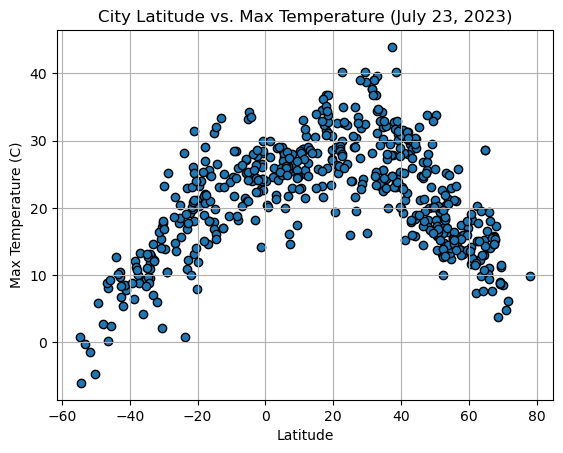

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values, marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (July 23, 2023)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

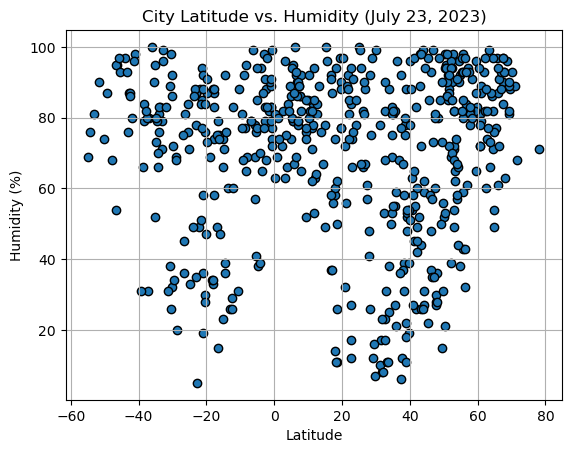

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values, marker='o', edgecolors='black')


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (July 23, 2023)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

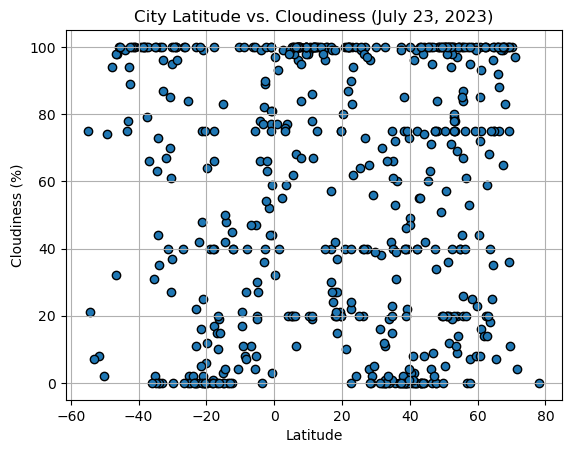

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values, marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (July 23, 2023)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

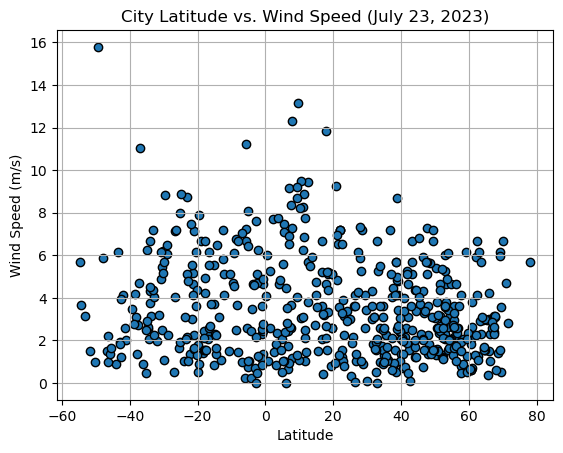

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values, marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (July 23, 2023)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [50]:
# Define a function to create Linear Regression plots
def linearRegress(hemi_x, hemi_y, eq_x, eq_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(hemi_x, hemi_y)
    regress_values = hemi_x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-value is: {abs(rvalue)}") 
    plt.scatter(hemi_x, hemi_y, marker='o', edgecolors='black')
    plt.plot(hemi_x, regress_values, "r-")
    plt.annotate(line_eq, (eq_x, eq_y), fontsize=15, color="red")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port blair,11.6667,92.7500,25.02,94,100,1.03,IN,1690145458
1,la mira,18.0350,-102.3266,31.64,58,27,4.63,MX,1690145773
5,fort mcmurray,56.7268,-111.3810,25.73,61,0,2.57,CA,1690145426
6,guerrero negro,27.9769,-114.0611,27.42,48,4,5.87,MX,1690145178
7,san jose del cabo,23.0589,-109.6977,32.60,74,100,3.13,MX,1690145481


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port alfred,-33.5906,26.8910,12.88,83,100,3.13,ZA,1690145299
3,waitangi,-43.9535,-176.5597,12.68,97,99,0.89,NZ,1690144974
4,luderitz,-26.6481,15.1594,14.83,45,100,7.13,NaN,1690145174
8,kerikeri,-35.2268,173.9474,9.39,95,2,0.45,NZ,1690145776
9,puerto natales,-51.7236,-72.4875,-1.46,90,8,1.50,CL,1690144981


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6158563089088613


Text(0.5, 1.0, 'Northern Hemisphere City Latitude vs. Max Temperature (July 23, 2023)')

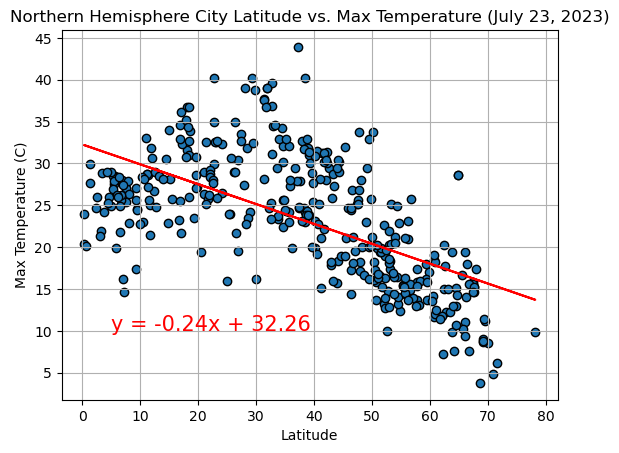

In [51]:
# Linear regression on Northern Hemisphere
linearRegress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 5, 10)


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (July 23, 2023)")

The r-value is: 0.8177527278281362


Text(0.5, 1.0, 'Southern Hemisphere City Latitude vs. Max Temperature (July 23, 2023)')

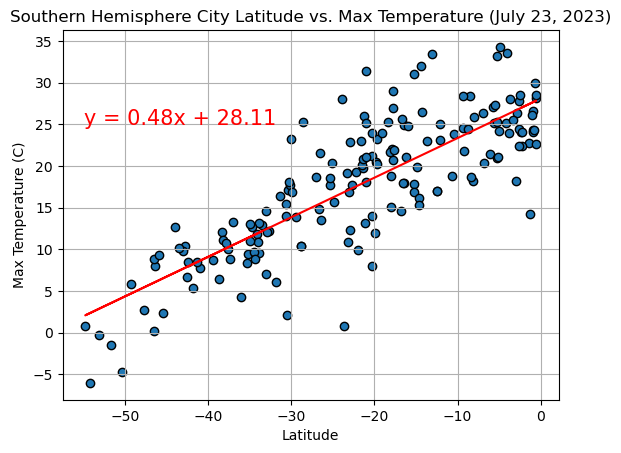

In [52]:
# Linear regression on Southern Hemisphere
linearRegress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], -55, 25)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Southern Hemisphere City Latitude vs. Max Temperature (July 23, 2023)")

**Discussion about the linear relationship:** It seems that based on the data shown in the graphs above that the closer a city is to the equator, the higher the current temperature and vice versa for moving in either direction away from the equator 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05329961889648528


Text(0.5, 1.0, 'Northern Hemisphere City Latitude vs. Humidity (July 23, 2023)')

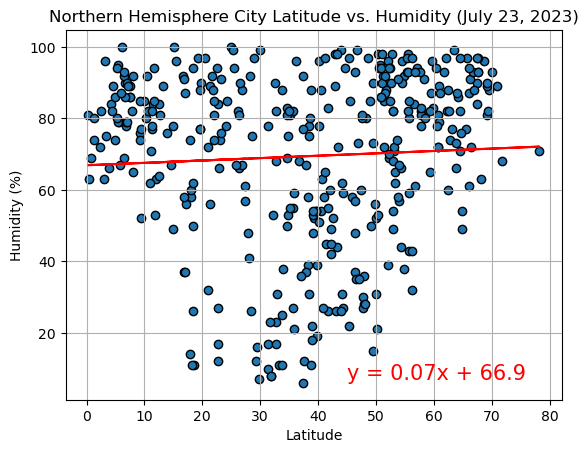

In [53]:
# Northern Hemisphere
linearRegress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 45, 7)


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere City Latitude vs. Humidity (July 23, 2023)")

The r-value is: 0.0583134711655032


Text(0.5, 1.0, 'Southern Hemisphere City Latitude vs. Humidity (July 23, 2023)')

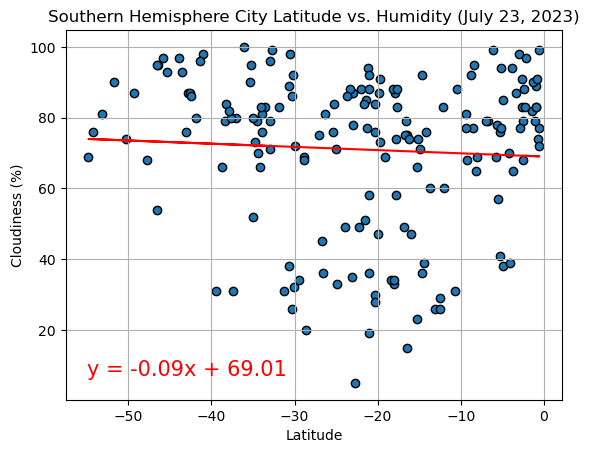

In [56]:
# Southern Hemisphere
linearRegress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], -55, 7)


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere City Latitude vs. Humidity (July 23, 2023)")

**Discussion about the linear relationship:** From the data provided there doesn't seem to be any correlation between the latitudinal location of a city and the hubmidity. However, if longitudinal data was compared as well a correlation would likely reveal itself relative to proximity to oceans or other large bodies of water

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05311558735901771


Text(0.5, 1.0, 'Northern Hemisphere City Latitude vs. Cloudiness (July 23, 2023)')

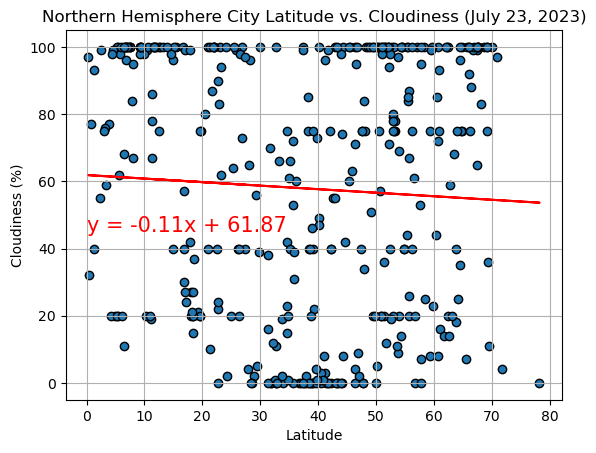

In [57]:
# Northern Hemisphere
linearRegress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 0, 45)


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (July 23, 2023)")

The r-value is: 0.18638363120013662


Text(0.5, 1.0, 'Southern Hemisphere City Latitude vs. Cloudiness (July 23, 2023)')

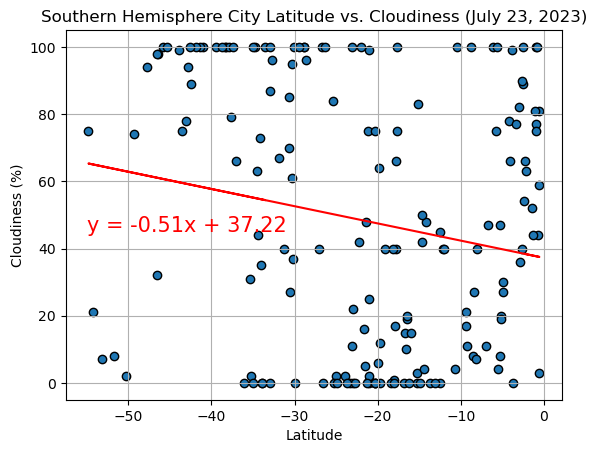

In [60]:
# Southern Hemisphere
linearRegress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], -55, 45)


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (July 23, 2023)")

**Discussion about the linear relationship:** From the data shown in the plots above, there seems to be little to no correlation between the latitudinal location of a city and the cloudiness of the city on the given date

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.24853296562205376


Text(0.5, 1.0, 'Northern Hemisphere City Latitude vs. Wind Speed (July 23, 2023)')

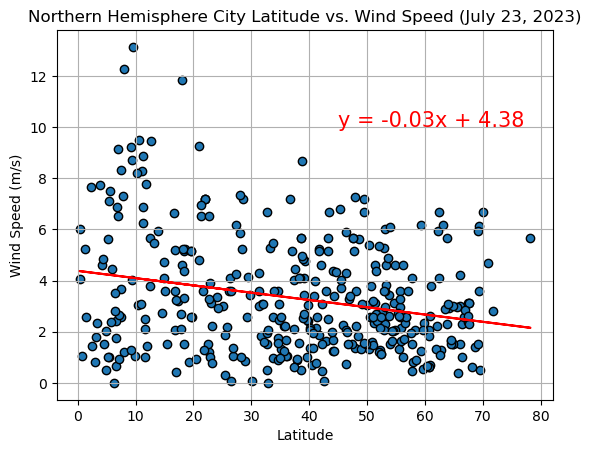

In [62]:
# Northern Hemisphere
linearRegress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 45, 10)


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Northern Hemisphere City Latitude vs. Wind Speed (July 23, 2023)")

The r-value is: 0.023169499582059123


Text(0.5, 1.0, 'Southern Hemisphere City Latitude vs. Wind Speed (July 23, 2023)')

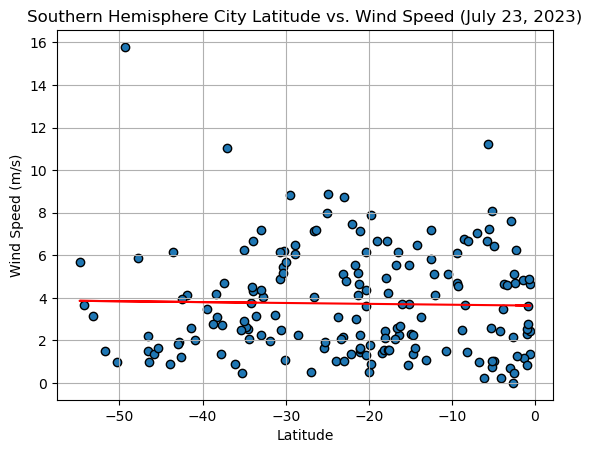

In [63]:
# Southern Hemisphere
linearRegress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], -55, 45)


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (July 23, 2023)")

**Discussion about the linear relationship:** In the Northern Hemispere there seems to be a slight correlation of cities located closer to the equator having a higher max wind speed for the given date. However, in the Southern hemisphere there is almost no correlation between the location of a given city and the max wind speed for the day